In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
#Load dataset
df = pd.read_csv('./Data/wine.csv')
df = df.dropna()
df.head()


In [5]:
# Take first column as the target and the rest are features
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [7]:
# Standardize the features to have mean=0 and variance=1
sc = StandardScaler()
X = sc.fit_transform(X)

In [8]:
# Compute the covariance matrix
cov_matrix = np.cov(X.T)

In [9]:
# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [10]:
# Sort the eigenvalues and corresponding eigenvectors in decreasing order
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

In [11]:
# Take the first 2 principal components
n_components = 2
eigenvectors = eigenvectors[:, :n_components]

In [13]:
# Transform the data and print
X_pca = np.dot(X, eigenvectors)

print('Explained variation per principal component: {}'.format(eigenvalues[:n_components]/np.sum(eigenvalues)))

Explained variation per principal component: [0.36198848 0.1920749 ]


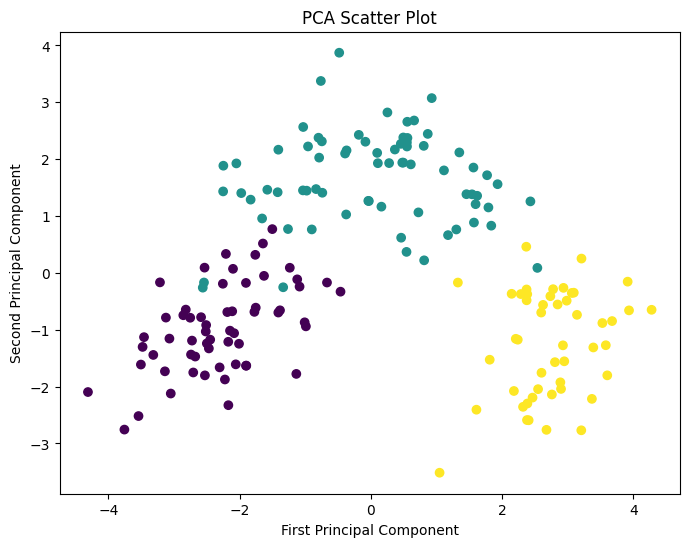

In [14]:
#Draw the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot')
plt.show()